# Bibliotecas

In [23]:
#pip install keras
import keras
from keras.applications import vgg16, resnet50, inception_v3
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.imagenet_utils import decode_predictions
#numpy já vem com o python
import numpy as np
#pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Constantes 

In [35]:
TAMANHO_IMAGEM = 224
CORES = 3 #RGB
PESOS = 'imagenet'
PRIMEIRA_CAMADA = True

# Carregando os modelos pré-treinados do Keras 

In [36]:
modelo = vgg16.VGG16(
    include_top = PRIMEIRA_CAMADA,
    weights=PESOS,
    input_shape=(TAMANHO_IMAGEM,TAMANHO_IMAGEM,CORES)
)

modelo1 = resnet50.ResNet50(
    include_top = PRIMEIRA_CAMADA,
    weights = PESOS,
    input_shape=(TAMANHO_IMAGEM,TAMANHO_IMAGEM,CORES)
)

modelo2 = inception_v3.InceptionV3(
    include_top = PRIMEIRA_CAMADA,
    weights=PESOS,
    input_shape=(TAMANHO_IMAGEM,TAMANHO_IMAGEM,CORES)
)

# Ajustando a dimensionalidade do arquivo a ser testado

In [37]:
arquivo = 'imagens/cat.jpg'

original = load_img(arquivo, target_size=(TAMANHO_IMAGEM, TAMANHO_IMAGEM))
numpy_imagem = img_to_array(original)
imagem_batch = np.expand_dims(numpy_imagem, axis=0)

print('Tamanho original da imagem:',original.size)
print('Tamanho da imagem + canais de cores:',numpy_imagem.shape)
print('Tamanho da imagem + canais de cores + tamanho do batch (bias):', imagem_batch.shape)

Tamanho original da imagem: (224, 224)
Tamanho da imagem + canais de cores: (224, 224, 3)
Tamanho da imagem + canais de cores + tamanho do batch (bias): (1, 224, 224, 3)


AxesImage(54,36;334.8x217.44)


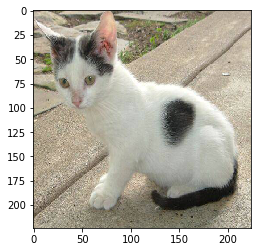

In [38]:
print(plt.imshow(np.uint8(imagem_batch[0])))

# VGG16

In [39]:
imagem_processada = vgg16.preprocess_input(imagem_batch.copy())
probabilidades = modelo.predict(imagem_processada)
resultados = decode_predictions(probabilidades)

print('Qtd. camadas: %d' % len(modelo.layers))
print('Classe: %s \nProbabilidade: %.2f' % (str(str(resultados[0][0][1]).replace('_',' ')).lower(),resultados[0][0][2]))

Qtd. camadas: 23
Classe: siamese cat 
Probabilidade: 0.31


# Resnet50 

In [40]:
imagem_processada = resnet50.preprocess_input(imagem_batch.copy())
probabilidades = modelo1.predict(imagem_processada)
resultados = decode_predictions(probabilidades)

print('Qtd. camadas: %d' % len(modelo1.layers))
print('Classe: %s \nProbabilidade: %.2f' % (str(str(resultados[0][0][1]).replace('_',' ')).lower(),resultados[0][0][2]))

Qtd. camadas: 177
Classe: siamese cat 
Probabilidade: 0.16


# InceptionV3 

In [41]:
imagem_processada = inception_v3.preprocess_input(imagem_batch.copy())
probabilidades = modelo2.predict(imagem_processada)
resultados = decode_predictions(probabilidades)

print('Qtd. camadas: %d' % len(modelo2.layers))
print('Classe: %s \nProbabilidade: %.2f' % (str(str(resultados[0][0][1]).replace('_',' ')).lower(),resultados[0][0][2]))

Qtd. camadas: 313
Classe: egyptian cat 
Probabilidade: 0.58
